# Imports

In [1]:
import pandas as pd
import inflection
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import datetime

# Helper Functions

# Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_stores_raw = pd.read_csv('data/store.csv', low_memory=False)

df_raw = pd.merge(df_sales_raw, df_stores_raw, how = 'left', on='Store')

# Descrição dos Dados

### Rename Columns: 

Nessa iremos alterar o nome das colunas de "camelcase" para "sneakcase"

In [3]:
df1 = df_raw.copy()

In [4]:
past_columns = [ 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
                 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
                 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
                 'Promo2SinceYear', 'PromoInterval']

sneakcase = lambda x: inflection.underscore(x)
list_columns = list(map(sneakcase, past_columns))

df1.columns = list_columns
df1

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dimensão dos Dados
Nesse setor iremos verificar a quantidade de linhas e colunas do nosso dataframe para verificar o tamanho de dados que temos.

In [5]:
print('Number of rowls: {} '.format(df1.shape[0]))
print('Number of columns: {} '.format(df1.shape[1]))

Number of rowls: 1017209 
Number of columns: 18 


### Tipos de Dados
Nesse setor iremos analisar os tipos de dados existentes

In [6]:
df1.date = pd.to_datetime(df1.date)
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### Checagem de Valores NA
Temos três métodos para alterar a presença de valores inexistentes, sendo estes:
- Eliminação dos valores NaN
- Usando algoritmos de "Machine Learning" para alterar os valores NaN
- Entender os motivos destes estarem presente nos dados e então realizar a alteração.

In [7]:
# competition_distance
# Replace the NA values to the max distance
df1['competition_distance'].apply(lambda x: df1['competition_distance'].max() if math.isnan(x) else x)

# competition_open_since_month 
# Replace the NA values to the moth
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)

# competition_open_since_year   
# Replace the NA values to the year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)

# promo2_since_week   
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1)

# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis = 1)

# promo_interval  
month_map = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
            7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# fill the promo_interval NaN to 0
df1['promo_interval'].fillna(0, inplace = True)

df1['month_promo'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_promo']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_promo'] in x['promo_interval'].split(',') else 0, axis = 1)

## Estatísticas Descritivas

Neste setor iremos realizar algumas estatísticas descritivas para entender melhor nossos dados, iremos inicialmente realizar algumas métricas simples para que no próximo ciclo seja implementada com mais robustez

In [9]:
# Select dtypes 
df_num = df1.select_dtypes(include = ['int64', 'float64'])
df_cat = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

# min, max, range, mean, median, std, skew
df_min = pd.DataFrame(df_num.min())
df_max = pd.DataFrame(df_num.max())
df_range = pd.DataFrame(df_num.max() - df_num.min())
df_mean = pd.DataFrame(df_num.mean())
df_median = pd.DataFrame(df_num.median())
df_std = pd.DataFrame(df_num.std())
df_skew = pd.DataFrame(df_num.skew())
df_kurtosis = pd.DataFrame(df_num.kurtosis())

df_metrics = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurtosis], axis = 1)
df_metrics.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
df_metrics

,min,max,range,mean,median,std,skew,kurtosis
store,1.0,1115.0,1114.0,558.429727,558.0,321.908651,-0.000955,-1.200524
day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997391,0.001593,-1.246873
sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.926175,0.641460,1.778375
customers,0.0,7388.0,7388.0,633.145946,609.0,464.411734,1.598650,7.091773
open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
promo,0.0,1.0,1.0,0.381515,0.0,0.485759,0.487838,-1.762018
school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
competition_distance,20.0,75860.0,75840.0,5430.085652,2330.0,7715.323700,2.928534,13.000022
competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311087,-0.042076,-1.232607
competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515593,-7.235657,124.071304


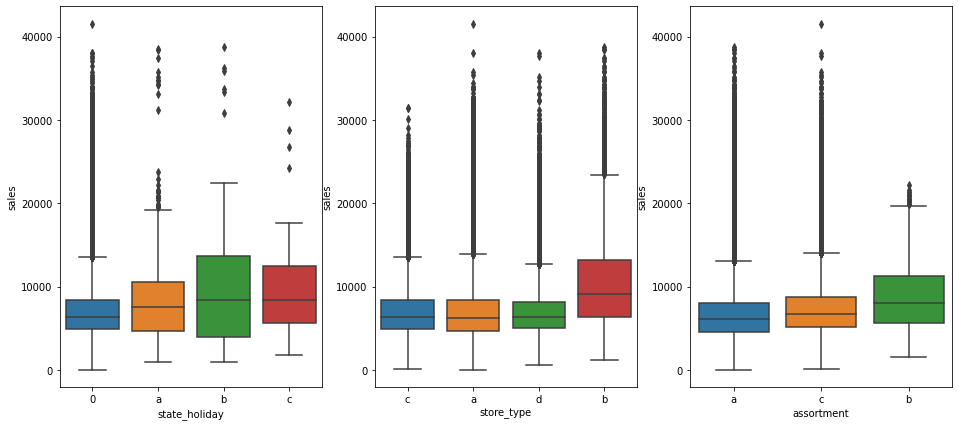

In [10]:
df_aux = df1[(df1['sales'] > 0) & (df1['state_holiday'] != 0)]
fig, axis = plt.subplots(1, 3,figsize = (16,7));
sns.boxplot(data = df_aux, x = 'state_holiday', y = 'sales', ax = axis[0]);
sns.boxplot(data = df_aux, x = 'store_type', y = 'sales', ax = axis[1]);
sns.boxplot(data = df_aux, x = 'assortment', y = 'sales', ax = axis[2]);

# Feature Engeneering

## Mapa Mental

Iremos realizar um mapa mental para apresentar todas as variáveis contidas em nosso problema, dando este suporte para a realização de hipóteses. <br>
No mundo corporativo, esse mapa mental é produzido a partir da reunião de "insights" com outras equipes da empresa.

In [ ]:
Image('images/mindmap.png')

## Hipóteses
A partir do mapa mental, iremos desenvolver as hipóteses das variáveis que levantamos<br>
Lembrando que no dia a dia da empresa, tanto as hipóteses como o mapa mental é construido a partir da reunião com outras áreas, fornecendo estas "insights" para a construção destes.

### Hipótese da Loja

- Quanto maior o estoque, maior será a venda da loja?
- Quanto maior o número de funcionários, maior é o faturamento da loja?
- Lojas que se localizam no centro vendem mais do que as que se localizam fora deste?
- Loja com maior sortimento (diferentes tipos) tem mais vendas?
- Loja com concorrentes próximos tendem a vender menos?
- Loja com consumidores a mais tempo vendem mais?
- Loja com maior numero de consumidores vendem mais?
- Loja com promoções vender mais?
- Loja com mais promoções consecutivas vender mais?

### Hipóteses do Produto
- Produtos com maior tempo de exposição da loja vendem mais?
- Produtos com uma qualidade maior vendem mais?
- Produtos que tem uma maior quantidade em vendem mais?
- Produtos com menor preço vendem mais?
- Produtos em que tem mais promoções vendem mais?
- Produtos em que se investem mais em marketing vendem mais?

### Hipóteses Temporal
- Lojas deveriam vender mais durante a semana do que nos fins de semana?
- Lojas vendem mais nos feriados?
- Lojas vendem mais com o passar dos anos?
- Lojas vendem mais durante o fim do ano?
- Lojas que tem mais promoções vendem mais?

### Hipóteses Selecionadas
Com as hipóteses levantadas, iremos em seguida realizar uma seleção de quais hipóteses podemos validar neste momento tendo como base os dados que possuímos resultando então nas seguintes hipóteses:

### Hipótese da Loja
1. Loja com concorrentes próximos tendem a vender menos?
2. Loja com maior numero de consumidores vendem mais?
3. Loja com consumidores a mais tempo vendem mais?
4. Loja com maior numero de consumidores vendem mais?
5. Loja com promoções vender mais?
6. Loja com mais promoções consecutivas vender mais?

### Hipóteses Temporal
7. Lojas deveriam vender mais durante a semana do que nos fins de semana?
8. Lojas vendem mais nos feriados?
9. Lojas vendem mais com o passar dos anos?
10. Lojas vendem mais durante o fim do ano?
11. Lojas que tem mais promoções vendem mais?

## Feature Engeneering

Neste setor iremos criar algumas variáveis que irão nos auxiliar para a análise dos dados. 

In [11]:
df2 = df1.copy()

In [ ]:
df2.dtypes

In [15]:
# Criando a variável year
df2['year'] = df2['date'].dt.year

# Criando a variável month
df2['month'] = df2['date'].dt.month

# Criando a variável day
df2['day'] = df2['date'].dt.day

# Criando a variável de semanas do ano
df2['week_of_year'] = df2['date'].dt.week

# Criando a variável semana e ano
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# Criando a variável competition since
df2['competition_open_since_year'] = df2['competition_open_since_year'].astype('int64')
df2['competition_open_since_month'] = df2['competition_open_since_month'].astype('int64')
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1)

# Criando a variável promoção / mês 
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# Criando a vari[avel promo since
df2['promo2_since_year'] = df2['promo2_since_year'].astype('int64')
df2['promo2_since_week'] = df2['promo2_since_week'].astype('int64')
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))

# Criando a variável de semanas 
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] ) / 7).apply(lambda x: x.days).astype(int)

# Alterando a variável Assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# Alterando a variável holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x:  'public_holiday' if x =='a' else 'easter' if x =='b' else 'christmas' )

/tmp/ipykernel_14874/2313606404.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.week


In [16]:
df2

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,christmas,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,christmas,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,christmas,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,christmas,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,christmas,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,public_holiday,1,a,...,1,2013,1,1,1,2013-00,2014-06-01,-18,2013-07-29,-30
1017205,1112,2,2013-01-01,0,0,0,0,public_holiday,1,c,...,0,2013,1,1,1,2013-00,2006-04-01,82,2012-12-31,0
1017206,1113,2,2013-01-01,0,0,0,0,public_holiday,1,a,...,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0
1017207,1114,2,2013-01-01,0,0,0,0,public_holiday,1,a,...,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


In [ ]:
df2['promo2_since_year']